In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_no_target.csv', index_col=0)

In [3]:
train.head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
48298,2.0,bus,2006,auto,140,c4,150000,gasoline,citroen,0.0,49191,380.0,4267
81047,NaN,NaN,2016,NaN,0,vito,150000,NaN,mercedes_benz,NaN,45896,NaN,2457
92754,2.2,limousine,2010,manual,175,mondeo,125000,diesel,ford,0.0,59229,930.0,10374
46007,NaN,NaN,2000,auto,265,andere,150000,gasoline,ford,0.0,39365,680.0,7098
76981,NaN,convertible,3,manual,109,2_reihe,150000,gasoline,peugeot,0.0,55271,NaN,2365


In [4]:
train = train.drop(labels='zipcode', axis=1)
test = test.drop(labels='zipcode', axis=1)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['type'].append(test['type']))
le.classes_

array(['bus', 'convertible', 'coupé', 'limousine', 'other', 'small car',
       'station wagon', nan], dtype=object)

In [6]:
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['gearbox'].append(test['gearbox']))
le.classes_

array(['auto', 'manual', nan], dtype=object)

In [8]:
train['gearbox'] = le.transform(train['gearbox'])
test['gearbox'] = le.transform(test['gearbox'])

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['fuel'].append(test['fuel']))
le.classes_

array(['compressed natural gas', 'diesel', 'gasoline',
       'liquefied petroleum gas', 'other', nan], dtype=object)

In [10]:
train['fuel'] = le.transform(train['fuel'])
test['fuel'] = le.transform(test['fuel'])

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['brand'].append(test['brand']))
le.classes_

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

In [12]:
train['brand'] = le.transform(train['brand'])
test['brand'] = le.transform(test['brand'])

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['model'].append(test['model']))
le.classes_

array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
       '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
       '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
       '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
       'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
       'amarok', 'andere', 'antara', 'arosa', 'astra', 'auris', 'avensis',
       'aveo', 'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
       'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
       'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
       'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
       'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
       'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma',
       'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery',
       'discovery_sport', 'doblo', 'ducato', 'duster', 'e_klasse',
       'elefant

In [14]:
train['model'] = le.transform(train['model'])
test['model'] = le.transform(test['model'])

<AxesSubplot:>

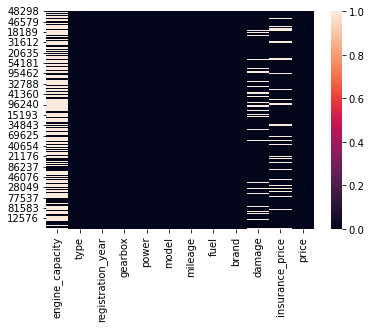

In [15]:
sns.heatmap(train.isna())

<AxesSubplot:>

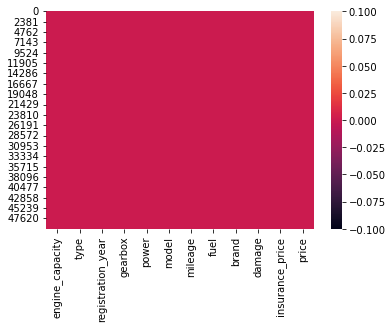

In [16]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

impured_train = pd.DataFrame(imp_mean.fit_transform(train), columns=train.columns)
impured_test = pd.DataFrame(imp_mean.fit_transform(test), columns=test.columns)

sns.heatmap(impured_train.isna())

In [17]:
impured_train.head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,insurance_price,price
0,2.0,0.0,2006.0,0.0,140.0,58.0,150000.0,2.0,5.0,0.0,380.0,4267.0
1,-1.0,7.0,2016.0,2.0,0.0,237.0,150000.0,5.0,20.0,-1.0,-1.0,2457.0
2,2.2,3.0,2010.0,1.0,175.0,156.0,125000.0,1.0,10.0,0.0,930.0,10374.0
3,-1.0,7.0,2000.0,0.0,265.0,40.0,150000.0,2.0,10.0,0.0,680.0,7098.0
4,-1.0,1.0,3.0,1.0,109.0,8.0,150000.0,2.0,25.0,0.0,-1.0,2365.0


In [18]:
train_X = impured_train.drop(labels='price', axis=1)
test_X = impured_test

train_y = pd.DataFrame(impured_train.iloc[:, 11])

train_X.head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,insurance_price
0,2.0,0.0,2006.0,0.0,140.0,58.0,150000.0,2.0,5.0,0.0,380.0
1,-1.0,7.0,2016.0,2.0,0.0,237.0,150000.0,5.0,20.0,-1.0,-1.0
2,2.2,3.0,2010.0,1.0,175.0,156.0,125000.0,1.0,10.0,0.0,930.0
3,-1.0,7.0,2000.0,0.0,265.0,40.0,150000.0,2.0,10.0,0.0,680.0
4,-1.0,1.0,3.0,1.0,109.0,8.0,150000.0,2.0,25.0,0.0,-1.0


In [19]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.33)

train_X.shape

(33500, 11)

In [20]:
train_X.head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,insurance_price
14763,-1.0,5.0,1.0,1.0,54.0,227.0,150000.0,1.0,27.0,0.0,-1.0
39737,2.0,0.0,2006.0,1.0,140.0,40.0,100000.0,2.0,5.0,0.0,240.0
20795,-1.0,0.0,1.0,1.0,114.0,40.0,150000.0,1.0,24.0,0.0,-1.0
1768,-1.0,1.0,2004.0,0.0,61.0,189.0,50000.0,2.0,32.0,1.0,280.0
7962,-1.0,6.0,2006.0,1.0,0.0,151.0,150000.0,1.0,27.0,0.0,110.0


In [21]:
train_y.head()

,price
14763,1046.0
39737,5460.0
20795,1456.0
1768,1592.0
7962,2002.0


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5000, random_state=764)
rf.fit(train_X, train_y.values.ravel())

RandomForestRegressor(n_estimators=5000, random_state=764)

In [23]:
from sklearn.metrics import mean_absolute_error
y_pred = rf.predict(valid_X)
mean_absolute_error(valid_y.values, y_pred)

1140.4227334259335

In [24]:
y_pred

array([7583.84528   , 6112.0744    ,  840.96361714, ..., 7267.78575   ,
       3440.5541    ,  480.2972    ])

In [ ]:
y_pred = rf.predict(test_X)

In [ ]:
result = pd.read_csv('test_no_target.csv')
result = result.drop(labels=result.columns[1:], axis=1)
result = result.set_axis(['Id'], axis='columns')
result.head()

In [ ]:
y_pred.shape

In [ ]:
test.shape

In [ ]:
result.shape

In [ ]:
result.insert(1, 'Predicted', y_pred)
result.head()

In [ ]:
result.dtypes

In [ ]:
result['Id'] = result['Id'].astype(int)

In [ ]:
result.dtypes

In [ ]:
result.head()

In [ ]:
result.to_csv(r'Result.csv', index = False)